### Multiple Tests

In this notebook, you will work with a  dataset (the judicial dataset).  However, instead of working with decisions already being provided, you are provided with a p-value associated with each individual.  

Use the questions in the notebook and the dataset to answer the questions at the bottom of this page.

Here is a glimpse of the data you will be working with:

In [7]:
import numpy as np
import pandas as pd

df = pd.read_csv('judicial_dataset_pvalues.csv')
df.head()

,defendant_id,actual,pvalue
0,22574,innocent,0.294126
1,35637,innocent,0.417981
2,39919,innocent,0.177542
3,29610,guilty,0.015023
4,38273,innocent,0.075371


**A p-value is the probability of observing your data or more extreme data, if the null is true.  Type I errors are when you choose the alternative when the null is true, and vice-versa for Type II.  Therefore, deciding an individual is guilty when they are actually innocent is a Type I error.  The alpha level is a threshold for the percent of the time you are willing to commit a Type I error.**

* You learned the null hypothesis is what we assume to be true before we collect any data, and the alternative is usually what we want to try and prove to be true.

* You learned that Type I errors are the worst type of errors, and these are associated with choosing the alternative when the null hypothesis is actually true.



* You learned that p-values are the probability of observing your data or something more extreme in favor of the alternative given the null hypothesis is true. You learned that using a confidence interval from the bootstrapping samples, you can essentially make the same decisions as in hypothesis testing (without all of the confusion of p-values).

* You learned how to make decisions based on p-values. That is, if the p-value is less than your Type I error threshold, then you have evidence to reject the null and choose the alternative. Otherwise, you fail to reject the null hypothesis.

* You learned that when sample sizes are really large, everything appears statistically significant (that is you end up rejecting essentially every null), but these results may not be practically significant. 

* You learned that when performing multiple hypothesis tests, your errors will compound. Therefore, using some sort of correction to maintain your true Type I error rate is important. A simple, but very conservative approach is to use what is known as a Bonferroni correction, which says you should just divide your α\alphaα level (or Type I error threshold) by the number of tests performed.

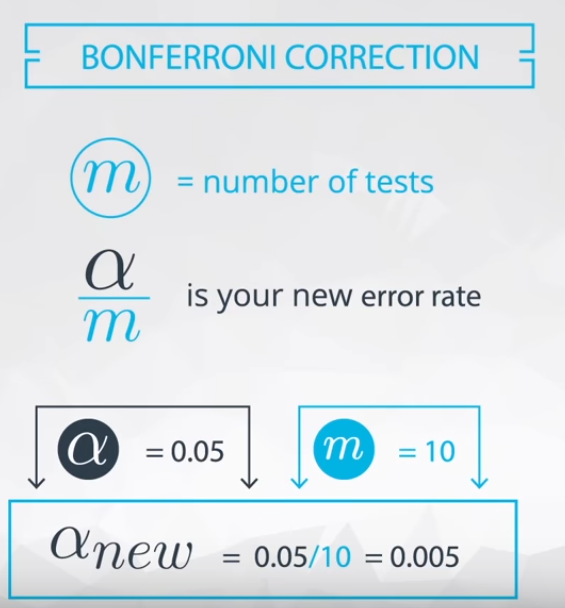

Other Techniques

Additional techniques to protect against compounding type I errors include:

   * [Tukey correction](http://www.itl.nist.gov/div898/handbook/prc/section4/prc471.htm)

   * [Q-values](http://www.nonlinear.com/support/progenesis/comet/faq/v2.0/pq-values.aspx)


`2.` If we consider each individual as a single hypothesis test, find the conservative Bonferroni corrected p-value we should use to maintain a 5% type I error rate.

In [2]:
bonf_alpha = 0.05/df.shape[0]
bonf_alpha

6.86530275985171e-06

In [3]:
df.loc[df.pvalue<bonf_alpha].shape[0]/df.shape[0]

0.0

`3.` What is the proportion of type I errors made if the correction isn't used?  How about if it is used?  

Use your answers to find the solution to **Quiz 3** below.

**In order to find the number of type I errors made without the correction - we need to find all those that are actually innocent with p-values less than 0.05.**

In [4]:
df.query("actual == 'innocent' and pvalue < 0.05").count()[0]/df.shape[0] # If not used

0.001510366607167376

In [5]:
df.query("actual == 'innocent' and pvalue < @bonf_alpha").count()[0]/df.shape[0] # If used

0.0

`4.` Think about how hypothesis tests can be used, and why this example wouldn't exactly work in terms of being able to use hypothesis testing in this way.  Check your answer with **Quiz 4** below.

**This is looking at individuals, and that is more of the aim for machine learning techniques.  Hypothesis testing and confidence intervals are for population parameters. Therefore, they are not meant to tell us about individual cases, and we wouldn't obtain p-values for individuals in this way. We could get probabilities, but that isn't the same as the probabilities associated with the relationship to sampling distributions as you have seen in these lessons.**